In [6]:
import pingouin as pg
import pandas as pd
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
import seaborn
import math

# Reading in Files

In [2]:
# Reading in Rscore files by stack and concatenate them
Rscore = pd.read_csv('E:/projects/connectome/results/HurstExp_ARMA_results/Rscore/Rscore_1.csv')
Rscore = Rscore.rename(columns={'Unnamed: 0':'ID'})
Rscore = Rscore.set_index('ID')
for i in range(2,21):
    file = 'E:/projects/connectome/results/HurstExp_ARMA_results/Rscore/Rscore_'+str(i)+'.csv'
    tmp = pd.read_csv(file)
    tmp = tmp.rename(columns={'Unnamed: 0':'ID'})
    tmp = tmp.set_index('ID')
    Rscore = pd.concat([Rscore, tmp],sort=True)

In [3]:
# sort by subject ID and save to file
Rscore = Rscore.sort_index(axis=0)
Rscore.to_csv('E:/projects/connectome/results/HurstExp_ARMA_results/Rscore/Rscore_all.csv',index=True)

Take a glance at the correlations

In [4]:
Rscore

,region 1,region 10,region 100,region 101,region 102,region 103,region 104,region 105,region 106,region 107,...,region 90,region 91,region 92,region 93,region 94,region 95,region 96,region 97,region 98,region 99
ID,,,,,,,,,,,,,,,,,,,,,
sub100206,0.577778,0.499567,0.236877,0.734088,0.588746,0.392808,0.343533,0.235192,0.509795,0.297801,...,0.150495,0.274362,0.146960,0.479305,0.400812,0.554257,0.223476,0.310247,0.140546,0.266089
sub100307,0.158970,0.115529,0.204814,0.754336,0.319410,0.345123,0.418674,0.160423,0.423491,0.235821,...,0.141427,0.272615,0.085426,0.205483,0.299554,0.466996,0.154099,0.238684,0.137808,0.251337
sub100408,0.512325,0.569544,0.096728,0.561145,0.480661,0.127104,0.152962,0.334564,0.482377,0.435996,...,0.148676,0.471044,0.167083,0.385619,0.486976,0.388404,0.166189,0.366597,0.258481,0.342660
sub100610,0.493200,0.356084,0.475077,0.605463,0.521259,0.304674,0.166119,0.184077,0.326222,0.513148,...,0.151427,0.213508,0.189256,0.417466,0.284429,0.636219,0.211406,0.301425,0.159687,0.157603
sub101006,0.211219,0.477625,0.553355,0.643060,0.263056,0.193794,0.335798,0.123288,0.127342,0.181051,...,0.113511,0.276871,0.187623,0.477632,0.450089,0.371634,0.161486,0.243900,0.112792,0.585100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub992673,0.360332,0.222595,0.484503,0.699027,0.405184,0.110415,0.220430,0.205992,0.174139,0.306590,...,0.096016,0.255639,0.265108,0.207263,0.324041,0.377919,0.191666,0.215318,0.492802,0.208620
sub992774,0.261387,0.329632,0.477020,0.485610,0.404330,0.368326,0.362416,0.248033,0.568988,0.335511,...,0.134614,0.255436,0.114225,0.410153,0.285895,0.474357,0.147779,0.257007,0.222999,0.148883
sub993675,0.208480,0.195626,0.585225,0.403053,0.419471,0.164312,0.260788,0.138072,0.235013,0.572503,...,0.161847,0.272917,0.143370,0.422217,0.134386,0.242520,0.171124,0.333232,0.153088,0.403724


Visualize with heatmap

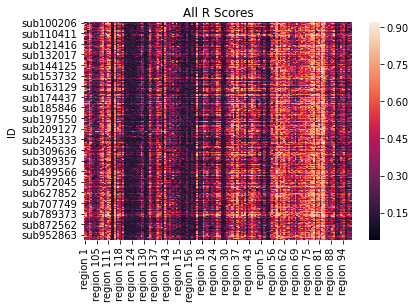

In [5]:
seaborn.heatmap(Rscore)
plt.title("All R Scores")
plt.show()

# Compute Average Correlation

We will utilize five different variance stabilizing transformations to facilitate the computation of average correlations. Brute force arithmetic averaging would not make much sense statistically. The easiet example of arithmetically averaging correlations to produce non-sensical result is r1=0.5 and r2=-0.5. In fact, since correlations are not normally distributed, we cannot take arithmetic average. By using stabilizing transformations, we wish to make the distribution of our correlations closer to normal (yet still not quite as indicated by the normality test). At least, now  the averages obtained would not sound as absurd. 

In [121]:
# Ideas of the following VST's: (1) transform data (2)compute average for the transformed data (3)inverse-transform the average
def fisherAvg(corrs):
    z = 0.5*np.log((1+corrs)/(1-corrs))
    avg_z = sum(z)/len(corrs)
    return (math.exp(2*avg_z) - 1) / (math.exp(2*avg_z) + 1)

def squareAvg(corrs):
    return math.sqrt(sum(corrs**2)/len(corrs))

def rootAvg(corrs):
    return (sum(corrs**0.5)/len(corrs))**2

def arccosAvg(corrs):
    return np.cos(sum(np.arccos(corrs))/len(corrs))

def harmonicAvg(corrs):
    return 1/(sum(1/np.arcsin(corrs))/len(corrs))

def geomAvg(corrs):
    return np.exp(sum(np.log(corrs))/len(corrs))

In [49]:
fisher_avg = []
square_avg = []
root_avg = []
arccos_avg = []
geom_avg = []
harmonic_avg = []

In [51]:
for i in range(1,161):
    reg = 'region '+str(i)
    fisher_avg.append(fisherAvg(Rscore[reg]))
    square_avg.append(squareAvg(Rscore[reg]))
    root_avg.append(rootAvg(Rscore[reg]))
    arccos_avg.append(arccosAvg(Rscore[reg]))
    harmonic_avg.append(harmonicAvg(Rscore[reg]))
    geom_avg.append(geomAvg(Rscore[reg]))

In [53]:
avg_corr_dict = {}
for i in range(160):
    reg = 'region '+str(i+1)
    avg_corr_dict[reg] = [fisher_avg[i]]
fisher_avg = pd.DataFrame(avg_corr_dict,index=['fisher_avg'])

avg_corr_dict = {}
for i in range(160):
    reg = 'region '+str(i+1)
    avg_corr_dict[reg] = [square_avg[i]]
square_avg = pd.DataFrame(avg_corr_dict,index=['square_avg'])

avg_corr_dict = {}
for i in range(160):
    reg = 'region '+str(i+1)
    avg_corr_dict[reg] = [root_avg[i]]
root_avg = pd.DataFrame(avg_corr_dict,index=['root_avg'])

avg_corr_dict = {}
for i in range(160):
    reg = 'region '+str(i+1)
    avg_corr_dict[reg] = [arccos_avg[i]]
arccos_avg = pd.DataFrame(avg_corr_dict,index=['arccos_avg'])

avg_corr_dict = {}
for i in range(160):
    reg = 'region '+str(i+1)
    avg_corr_dict[reg] = [harmonic_avg[i]]
harmonic_avg = pd.DataFrame(avg_corr_dict,index=['harmonic_avg'])


avg_corr_dict = {}
for i in range(160):
    reg = 'region '+str(i+1)
    avg_corr_dict[reg] = [geom_avg[i]]
geom_avg = pd.DataFrame(avg_corr_dict,index=['geom_avg'])

Now lump everything into a singe dataframe for convenient viewing

In [54]:
averages = pd.concat([square_avg,root_avg,fisher_avg,arccos_avg,harmonic_avg,geom_avg],axis=0)

In [55]:
averages

,region 1,region 2,region 3,region 4,region 5,region 6,region 7,region 8,region 9,region 10,...,region 151,region 152,region 153,region 154,region 155,region 156,region 157,region 158,region 159,region 160
square_avg,0.546324,0.546324,0.410183,0.149797,0.517921,0.356824,0.501269,0.405878,0.400561,0.535676,...,0.276554,0.156875,0.186953,0.164037,0.289361,0.169913,0.152982,0.264860,0.175469,0.178555
root_avg,0.489467,0.489467,0.362429,0.143147,0.475185,0.297940,0.441064,0.350147,0.341465,0.482848,...,0.248358,0.145933,0.170908,0.153563,0.262958,0.158293,0.145064,0.232466,0.162231,0.163352
fisher_avg,0.540022,0.540022,0.392490,0.145433,0.510387,0.330496,0.488878,0.385343,0.377717,0.529020,...,0.260994,0.149600,0.176773,0.157243,0.275172,0.162436,0.147760,0.246578,0.166959,0.168764
arccos_avg,0.524799,0.524799,0.385456,0.145308,0.500285,0.323705,0.475399,0.376897,0.369498,0.515109,...,0.259284,0.149350,0.176312,0.157013,0.273511,0.162156,0.147600,0.244787,0.166622,0.168358
harmonic_avg,0.428754,0.318623,0.138008,0.435847,0.248401,0.379253,0.299380,0.286248,0.431495,0.345187,...,0.138606,0.158824,0.145606,0.238609,0.149082,0.139342,0.205195,0.152267,0.152425,0.144708
geom_avg,0.465781,0.345511,0.141222,0.458018,0.279010,0.417354,0.330859,0.320708,0.461559,0.377958,...,0.143098,0.166317,0.150556,0.253942,0.154903,0.142868,0.222259,0.158464,0.159152,0.150793


# Extract the Regions with the Highest Correlations

In [110]:
n = 15 # top 10 regions with the highest correlations to the original time-series
col_names = ['top '+str(i+1) for i in range(top_n)] 
top_n_regions = pd.DataFrame(columns=col_names) # get the most correlated regions out based on each averaging methods

In [114]:
avg_methods = ['square_avg','root_avg','arccos_avg','harmonic_avg','geom_avg','fisher_avg']
top_n_regions = []
for j,avg_method in enumerate(avg_methods):
    tmp = {}
    # use double brackets [[]] in .loc to extract a row/columns in the form of dataframe;
    # otherwise, if used only single bracket [], that row would be extracted a series a lose index/column names 
    sorted_avg = averages.loc[[avg_method]].T.sort_values(by=avg_method,ascending=False)[:n].T
    cols = sorted_avg.columns
    for i,col in enumerate(cols):
        # to create a dataframe with tuple entries, wrap the tuples in a list
        # so dict[key]=[(tuple)] then pd.DataFrame(dict) 
        tmp['top '+str(i+1)]=[(col,round(sorted_avg[col].values[0],3))] # round the correlation to 3 decimal digts
    top_n_regions.append(pd.DataFrame(tmp,index=[avg_method]))

In [116]:
pd.concat(top_n_regions,axis=0)

,top 1,top 2,top 3,top 4,top 5,top 6,top 7,top 8,top 9,top 10,top 11,top 12,top 13,top 14,top 15
square_avg,"(region 84, 0.745)","(region 85, 0.712)","(region 80, 0.71)","(region 60, 0.709)","(region 79, 0.676)","(region 82, 0.665)","(region 116, 0.661)","(region 61, 0.659)","(region 36, 0.655)","(region 39, 0.646)","(region 81, 0.644)","(region 75, 0.64)","(region 38, 0.637)","(region 63, 0.632)","(region 78, 0.618)"
root_avg,"(region 84, 0.738)","(region 85, 0.701)","(region 60, 0.698)","(region 80, 0.697)","(region 79, 0.651)","(region 82, 0.65)","(region 116, 0.646)","(region 61, 0.64)","(region 36, 0.627)","(region 81, 0.625)","(region 75, 0.625)","(region 39, 0.622)","(region 63, 0.614)","(region 38, 0.609)","(region 78, 0.598)"
arccos_avg,"(region 84, 0.746)","(region 85, 0.711)","(region 80, 0.709)","(region 60, 0.709)","(region 79, 0.672)","(region 82, 0.662)","(region 116, 0.659)","(region 61, 0.655)","(region 36, 0.649)","(region 39, 0.641)","(region 81, 0.639)","(region 75, 0.637)","(region 38, 0.631)","(region 63, 0.628)","(region 78, 0.613)"
harmonic_avg,"(region 83, 0.822)","(region 84, 0.761)","(region 59, 0.759)","(region 79, 0.751)","(region 81, 0.686)","(region 115, 0.681)","(region 78, 0.67)","(region 60, 0.666)","(region 74, 0.653)","(region 80, 0.649)","(region 62, 0.636)","(region 38, 0.635)","(region 35, 0.632)","(region 77, 0.613)","(region 37, 0.612)"
geom_avg,"(region 83, 0.735)","(region 84, 0.696)","(region 59, 0.694)","(region 79, 0.691)","(region 81, 0.644)","(region 78, 0.641)","(region 115, 0.64)","(region 60, 0.632)","(region 74, 0.619)","(region 80, 0.618)","(region 35, 0.615)","(region 38, 0.612)","(region 62, 0.607)","(region 37, 0.598)","(region 77, 0.59)"
fisher_avg,"(region 84, 0.752)","(region 85, 0.718)","(region 80, 0.717)","(region 60, 0.716)","(region 79, 0.684)","(region 82, 0.669)","(region 116, 0.666)","(region 61, 0.664)","(region 36, 0.66)","(region 39, 0.651)","(region 81, 0.647)","(region 75, 0.643)","(region 38, 0.642)","(region 63, 0.635)","(region 78, 0.62)"


# Plotting the Ensemble Time-series on top of the Original

In [134]:
def plotTS(sub,reg,start,end):
    # sub: subject ID
    # reg: region number
    # start, end: starting point and end point of the time-series that is to be plotted
    fitted_file = 'E:/projects/connectome/results/HurstExp_ARMA_results/ensemble_ts/ensemble_ts_'+str(sub)+'.mat'
    fitted_matrix = scipy.io.loadmat(fitted_file)
    fitted_ts = fitted_matrix['ensemble_ts'][reg-1][start:end]
    original_file = 'E:/projects/connectome/data/FMRI_820subjects/DOS160_TC_HCP_REST1RL_'+str(sub)+'.mat'
    original_matrix = scipy.io.loadmat(original_file)
    original_ts = original_matrix['tc'][:,reg-1][start:end]
    plt.plot(fitted_ts, color='g',label='fitted_ensemble')
    plt.plot(original_ts, color='r', label='original' )
    plt.legend()
    plt.show()

In [123]:
sub = 100206
sub_file= 'E:/projects/connectome/results/HurstExp_ARMA_results/ensemble_ts/ensemble_ts_'+str(sub)+'.mat'
sub_mat = scipy.io.loadmat(sub_file)

original_file = 'E:/projects/connectome/data/FMRI_820subjects/DOS160_TC_HCP_REST1RL_'+str(sub)+'.mat'
original_matrix = scipy.io.loadmat(original_file)

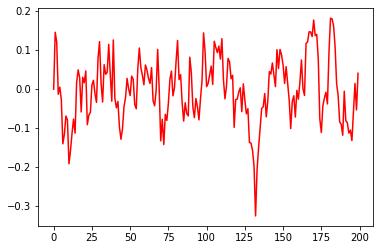

In [124]:
fitted = sub_mat['ensemble_ts'][0][0:200]
plt.plot(fitted,color='r',label='ensemble_ARMA')

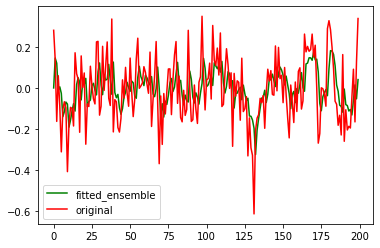

In [126]:
plotTS(100206,1,0,200)

In [291]:
for i in range(1,161):
    reg = 'region '+str(i)
    square_r = (Rscore[reg])**2
    fisher_r = 0.5*np.log((1+Rscore[reg])/(1-Rscore[reg]))
    arcsin_r = np.arccos(Rscore[reg])
    if scipy.stats.kstest(arccos_r,'norm')[1]>0.05:
        print('region {} is normal'.format(i))

# Trying out Order 1 Differencing

In [1]:
import statsmodels

In [2]:
from statsmodels.tsa import stattools

In [61]:
sub = 100206
reg = 81
original_file = 'E:/projects/connectome/data/FMRI_820subjects/DOS160_TC_HCP_REST1RL_'+str(sub)+'.mat'
original_matrix = scipy.io.loadmat(original_file)
original_ts = original_matrix['tc'][:,reg-1]

In [62]:
PACF=stattools.pacf(original_ts)

In [63]:
ACF[1]

0.5878775335286538

<BarContainer object of 41 artists>

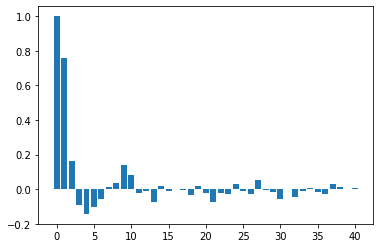

In [64]:
plt.bar(range(len(PACF)),PACF)

In [3]:
def CalcHurstExp(ts):  
    lags = range(2, 100)
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]  
    poly = np.polyfit(np.log(lags), np.log(tau), 1)  
    hurst = poly[0]*2.0  
    return max(hurst,0)

def fisherTrans(r):
    return 0.5*(np.log((1+r)/(1-r)))

def fisherAvg(r_scores):
    avg_z = sum([fisherTrans(r_scores[i]) for i in range(len(r_scores))])/len(r_scores)
    avg_r = (math.exp(2*avg_z)-1)/(math.exp(2*avg_z)+1)
    return avg_r

# Function computeWeights compute the corresponding model weights with their AIC scores
def computeWeights(AIC):
    min_AIC = min(AIC)
    AIC = np.array(AIC)
    prob = []
    for i in range(len(AIC)):
        prob.append(math.exp((min_AIC-AIC[i])/2))
    prob = np.array(prob)
    return prob/sum(prob)

def computeEnsemble(models,weights):
    ensemble=np.array([0 for _ in range(len(models[0]))])
    for i in range(len(models)):
        ensemble = ensemble + np.array(models[i])*weights[i]
    return list(ensemble)

In [4]:
import csv
import time
import math
import numpy as np
import scipy.io
import pandas as pd
from matplotlib import pyplot as plt
from os import listdir
from os.path import dirname, join
from numpy import log, polyfit, sqrt, std, subtract
from hurst import compute_Hc
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pearsonr
from datetime import datetime


In [5]:
mat_files = listdir('E:/projects/connectome/data/FMRI_820subjects')
subject_ts=[]
input_files_dir = 'E:/projects/connectome/data/FMRI_820subjects'
for mat_file in mat_files:
    file_name = join(input_files_dir,mat_file)
    temp = scipy.io.loadmat(file_name)  
    subject_ts.append(temp['tc'])

In [6]:
# order_and_weight = models_weights[region] stores the weights of ARMA models for a subject
order_and_weight = [None for _ in range(len(subject_ts[0][0]))] 
# Rscore = Rscore[region] stores the Pearson correlation between fitted ARMA models and original time-series
Rscore = [None for _ in range(len(subject_ts[0][0]))] 
# ensemble_model = ensemble_model[region] stores the ensemble ARMA models for each resion
ensemble_ts = [None for _ in range(len(subject_ts[0][0]))] 
# Each of the model orders, paired with its model_weights as a tuple, Rscore and ensemble_model will be updated in each loop step and stored in files before they get updated

In [7]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print('Computation started at '+ str(current_time))
p_max = 6
q_max = 6
for sub in range(1): # only 41 subjects in each stack
    for reg in range(40):
        
        
        ts = subject_ts[sub][:,reg]
        PACF=stattools.acf(ts) # use partial auto-correlation to determine the differencing order
        if PACF[1]>0.5:
            d=1 # if the lag-1 autocorrelation is strong, take an order 1-differencing
        else:
            d=0
        predictions = [] # a 2D array that stores the predicted values of all fitted models
        AIC = [] # an 1D array that stores AIC scores
        orders = []
        for p in range(1,p_max):
            for q in range(0,q_max):
                try:
                    fitted_model = ARIMA(ts,order=(p,d,q)).fit(disp=-1)
                    predictions.append(fitted_model.predict(start=1,end=1200))
                    orders.append((p,d,q))
                    AIC.append(fitted_model.aic)
                    weights = computeWeights(AIC)
                    orders_and_weights = [orders, weights]
                    #print("finished computating region {} with (p,d,q)=({},{},{})".format(reg,p,d,q))
                except:
                    #print("Could not fit region {} with (p,d,q)=({},{},{})".format(reg,p,d,q))
                    continue
        
        ensemble = computeEnsemble(predictions,weights)
        Rscore[reg] = pearsonr(ensemble,ts)[0]
        
        order_and_weight[reg]=orders_and_weights
        ensemble_ts[reg] = ensemble
        
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print('subject {} region {} finished at {}'.format(sub,reg,str(current_time)))

Computation started at 21:43:18
subject 0 region 0 finished at 21:44:07
subject 0 region 1 finished at 21:44:28
subject 0 region 2 finished at 21:44:47
subject 0 region 3 finished at 21:45:29
subject 0 region 4 finished at 21:45:52
subject 0 region 5 finished at 21:46:25
subject 0 region 6 finished at 21:47:12
subject 0 region 7 finished at 21:47:43
subject 0 region 8 finished at 21:47:53
subject 0 region 9 finished at 21:48:20
subject 0 region 10 finished at 21:48:54
subject 0 region 11 finished at 21:49:22
subject 0 region 12 finished at 21:49:37
subject 0 region 13 finished at 21:50:01
subject 0 region 14 finished at 21:50:20
subject 0 region 15 finished at 21:51:37
subject 0 region 16 finished at 21:52:26
subject 0 region 17 finished at 21:52:47
subject 0 region 18 finished at 21:53:13
subject 0 region 19 finished at 21:53:41
subject 0 region 20 finished at 21:54:07
subject 0 region 21 finished at 21:54:58
subject 0 region 22 finished at 21:55:24
subject 0 region 23 finished at 21:

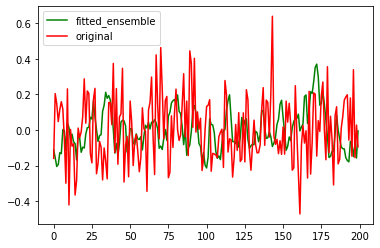

In [14]:
plt.plot(ensemble_ts[39][:200], color='g',label='fitted_ensemble')
plt.plot(subject_ts[1][:,39][:200], color='r', label='original' )
plt.legend()
plt.show()

In [112]:
order_and_weight[1][1]

array([7.97904396e-10, 1.28724786e-01, 1.18462015e-01, 2.61543030e-02,
       7.10006274e-03, 1.81659012e-03, 1.15742844e-01, 2.60062569e-01,
       5.64671865e-02, 1.02698718e-02, 6.93860051e-03, 1.06196243e-03,
       1.06252810e-01, 4.24356752e-02, 1.43476839e-02, 7.43482465e-03,
       2.55428578e-03, 4.14803605e-04, 2.34030523e-02, 2.44203634e-02,
       8.51160966e-03, 8.58495707e-03, 1.86286284e-03, 3.27776876e-04,
       1.60630800e-02, 6.04890308e-03, 2.52641393e-03, 1.43535377e-03,
       4.63327943e-04, 1.11424155e-04])

In [117]:
Rscore[:41]

[0.9254347505200093,
 0.8689729883026591,
 0.3882807748086434,
 0.9168972627992074,
 0.6510788580007087,
 0.8805201282681545,
 0.85207729497913,
 0.8627475406755473,
 0.85188903062219,
 0.8906094786422905,
 0.8000308847381568,
 0.8610998829591704,
 0.798742561008047,
 0.8574775750820065,
 0.3812312881473702,
 0.9592333372171533,
 0.8824014865013676,
 0.5335582760738917,
 0.8809897676514249,
 0.8225956940200911,
 0.6558545218161147,
 0.7331436306500582,
 0.6861970304285994,
 0.8391253161769351,
 0.7530198828283574,
 0.9303471318160417,
 0.7262398307761101,
 0.7512431880534445,
 0.7515825016765998,
 0.7717659980546181,
 0.8704327362696804,
 0.7928228238753929,
 0.898782041763172,
 0.9673167031798069,
 0.9688909861975044,
 0.8624083708523032,
 0.9543478177463178,
 0.961480783847774,
 0.9140316566963754,
 0.9429781279794085,
 0.9699853746735665]

In [15]:
Rscore[:41]

[-0.9128079784289552,
 0.7904472547433705,
 0.3182574245687344,
 -0.9093511276253722,
 0.5585916164597267,
 0.8650566559892272,
 0.2932872292957598,
 0.8540274137783547,
 0.85012021774728,
 0.9070796110706305,
 0.8417918610577735,
 0.845397133375406,
 0.7743245573849125,
 0.8648689766828177,
 0.06453896360978664,
 -0.8934218437661399,
 0.7479110833398857,
 0.44514580048060925,
 0.8616044454879968,
 0.8015525400541921,
 0.6362129355350229,
 0.6097238497417841,
 0.590977531660442,
 0.792085337997608,
 0.6665776897957469,
 0.9281554845983819,
 0.7602960189258989,
 0.706933722143892,
 0.752061959627031,
 0.6058940882373813,
 0.8729820749123752,
 0.7803836404246619,
 0.8814271764666788,
 -0.766177730591935,
 -0.7798056738663871,
 0.851966977148054,
 -0.8503480079397447,
 -0.8348651534493956,
 -0.9043514943779221,
 0.9355475639670923,
 None]